## Effect of batch size notebook

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_PATH
)
from experiments.utils.parser import Parser

In [2]:
series = 7
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_PATH,
    'series',
    str(series))
loader = Parser(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [3]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['16'],
    'data_type': 'image',
    'max_batch_size': ['1', '2', '4', '8', '16'],
    'max_batch_time': ['1'],
    'memory_request': ['40Gi'],
    'model_variants': ['yolov5n', 'yolov5m', 'yolov5x'],
    'node_name': 'yolo',
    'pipeline_name': '5-paper-video',
    'repetition': 2,
    'replicas': [1],
    'series': 7,
    'series_meta': 'checking the effect of batch size under 20 and 40 arrival '
                   'rates (redo of 11 in 60s), \\n cpu type: Intel(R) Xeon(R) '
                   'Gold 6126 CPU @ 2.60GHz',
    'timeout': 120,
    'workload_config': {'load_duration': 60, 'loads_to_test': [20]},
    'workload_type': 'static'}


,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5n,1,0.141744,9690.815776,0.098742
1,yolov5n,1,0.158548,12986.130307,0.105714
2,yolov5n,2,NaN,NaN,NaN
3,yolov5n,2,NaN,NaN,NaN
4,yolov5n,4,NaN,NaN,NaN
5,yolov5n,4,0.426844,996.678146,0.335882
6,yolov5n,8,0.866983,799.734438,0.740739
7,yolov5n,8,1.020552,2550.513163,0.689042
8,yolov5n,16,1.667528,1005.480763,1.390429
9,yolov5n,16,1.833011,3038.173957,1.625249


Text(0, 0.5, 'Latency (seconds)')

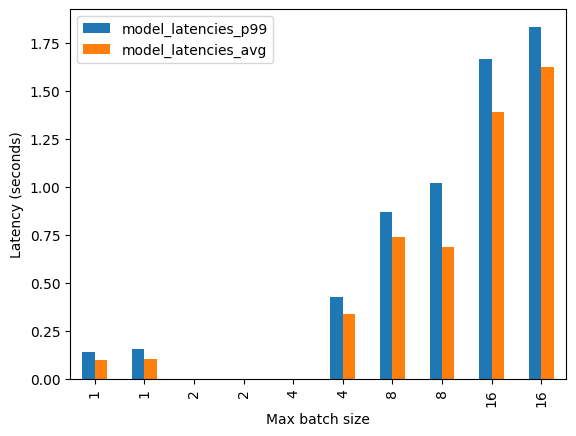

In [4]:
model_variant = 'yolov5n'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5m,1,0.268590,2553.978211,0.171866
1,yolov5m,1,0.219287,7197.260362,0.164253
2,yolov5m,2,0.464614,1504.128780,0.336337
3,yolov5m,2,0.373560,4512.006248,0.330597
4,yolov5m,4,0.970056,1498.723578,0.699647
5,yolov5m,4,0.664857,4343.187210,0.657944
6,yolov5m,8,1.712019,1427.446186,1.517120
7,yolov5m,8,1.566194,4372.767344,1.497280
8,yolov5m,16,3.846781,1617.417260,3.311131
9,yolov5m,16,3.131769,4686.270114,3.075621


Text(0, 0.5, 'Latency (seconds)')

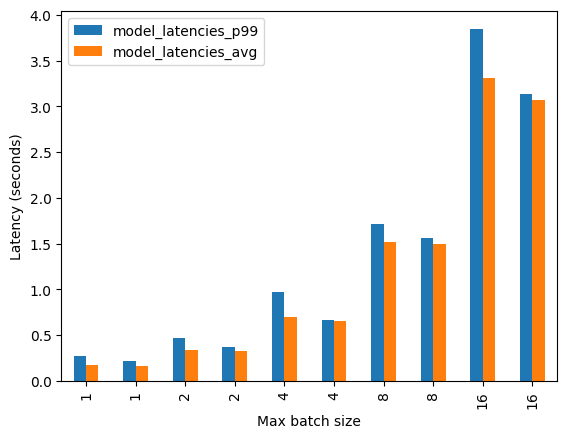

In [5]:
model_variant = 'yolov5m'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5m']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5x,1,0.585411,3918.970438,0.441459
1,yolov5x,1,0.580602,11541.881829,0.439337
2,yolov5x,2,1.170786,2756.131583,0.946361
3,yolov5x,2,0.961140,7662.844548,0.893218
4,yolov5x,4,2.083816,2669.060326,1.851528
5,yolov5x,4,1.843578,7387.788000,1.789491
6,yolov5x,8,4.446179,2626.296255,3.852453
7,yolov5x,8,3.607007,7452.027855,3.607007
8,yolov5x,16,9.314572,2913.751210,8.605488
9,yolov5x,16,NaN,8456.051480,NaN


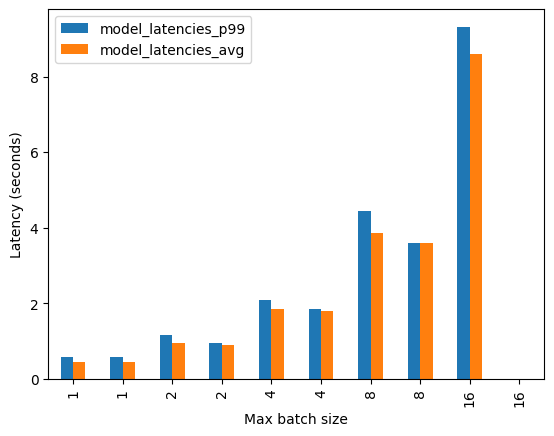

In [6]:
model_variant = 'yolov5x'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5x']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")
output

,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5n,16,40Gi,0.866983,799.734438,0.740739
1,yolov5n,16,40Gi,1.020552,2550.513163,0.689042
2,yolov5m,16,40Gi,1.712019,1427.446186,1.517120
3,yolov5m,16,40Gi,1.566194,4372.767344,1.497280
4,yolov5x,16,40Gi,4.446179,2626.296255,3.852453
5,yolov5x,16,40Gi,3.607007,7452.027855,3.607007


Text(0, 0.5, 'Latency (seconds)')

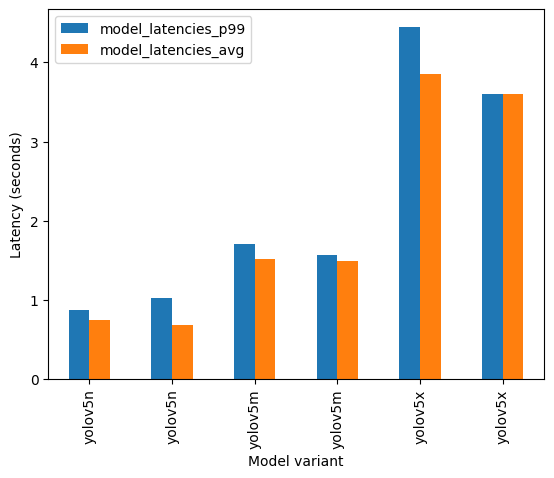

In [7]:
max_batch_size = 8
experiment_ids = key_config_df[
    key_config_df['max_batch_size'] == max_batch_size]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Model variant")
ax.set_ylabel("Latency (seconds)")

,max_batch_size,memory_usage_max
0,1,9.103090e+09
1,1,2.845776e+10
2,2,1.158096e+10
3,2,2.257123e+10
4,4,9.452233e+09
5,4,2.038398e+10
6,8,5.938315e+09
7,8,1.768560e+10
8,16,6.912500e+09
9,16,2.002090e+10


Text(0, 0.5, 'Memory Usage (Mb)')

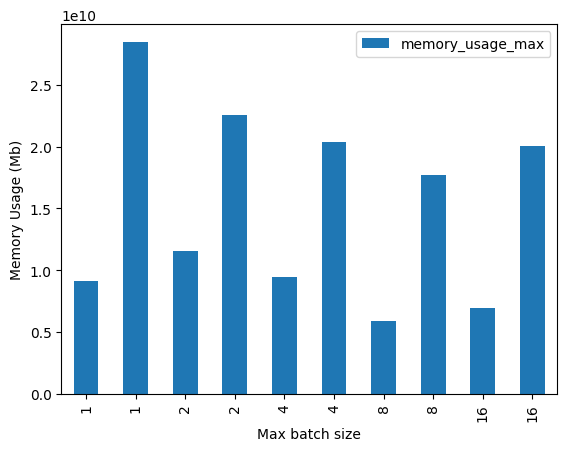

In [8]:
model_vairant = 'yolov5x'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_vairant]['experiment_id'].tolist()
metadata_columns = ['max_batch_size']
results_columns = ['memory_usage_max']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['memory_usage_max'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Memory Usage (Mb)")